# Exoplanets HW3 
## Steven Stetzler and Miles Currie

### Problem 1

Install Rebound

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import rebound
from __future__ import division, print_function
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

### Problem 2
Look up the parameters of the planet system GJ 876.  Assume the planets’ orbits lie in a plane, and vary the inclination of the system.  At what inclination does the system become unstable after 1000 orbits of the inner planet? What upper limit does this place on the planets’ masses?  At what inclination would the planets be seen to transit?  What lower limit does this place on the planets’ masses?


### From [Rivera et al. (2010)](https://iopscience.iop.org/article/10.1088/0004-637X/719/1/890/pdf):
<img src="GJ876_planet_params.png">
<img src="GJ876_stellar_params.png">

In [29]:
class Planet():
    def __init__(self, P, m, a, K, e, omega, mean_anomoly):
        self.P = P 
        self.m = m
        self.a = a
        self.K = K
        self.e = e
        self.omega = omega
        self.mean_anomoly = mean_anomoly

In [ ]:
def K_to_Msini(K):
    

In [38]:
sim = rebound.Simulation()
sim.units = ('days', 'AU', 'Mearth')
print("G = {0}.".format(sim.G))

G = 8.88769244513e-10.


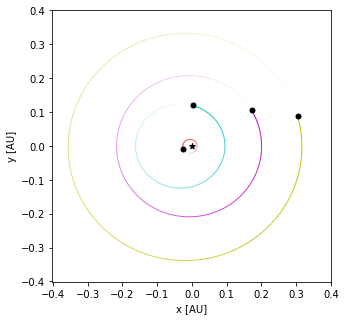

In [40]:
sim = rebound.Simulation()
sim.units = ('days', 'AU', 'Mearth')

M_JUPITER_TO_M_EARTH = 317.8
M_SUN_TO_M_EARTH = 332946

planets = [
    Planet(1.937780, 6.83, 0.02080665, 6.56, 0.207, 234, 355),
    Planet(30.0881, M_JUPITER_TO_M_EARTH * 0.7142, 0.129590, 88.34, 0.25591, 48.76, 294.59),
    Planet(61.1166, M_JUPITER_TO_M_EARTH * 2.2756, 0.208317, 214, 0.0324, 50.3, 325.7),
    Planet(124.26, 14.6, 0.3343, 3.42, 0.055, 239, 335)
]

# Add center star
sim.add(m=0.32 * M_SUN_TO_M_EARTH)
# Add all planets
for planet in planets:
    sim.add(m=planet.m, a=planet.a, e=planet.e, P=planet.P, omega=planet.omega, M=planet.mean_anomoly)

# convert to center of mass coordinates
sim.move_to_com()
sim.dt = sim.particles[1].P * 0.05  # timestep is 5% of orbital period
sim.integrator = "whfast"
sim.automateSimulationArchive("archive.bin", interval=1e3, deletefile=True)

sim.move_to_com()
for i in range(10):
    sim.integrate(sim.t + 0.5)
    fig = rebound.OrbitPlot(sim, color=True, unitlabel="[AU]", lim=1.2 * max([planet.a for planet in planets]))
    display(fig)
    plt.close(fig)
    clear_output(wait=True)

### Problem 3
Compute the radial velocity of the star, and then fit this RV with four Keplerian orbits. How big are the residuals?  How does this compare to typical RV errors?

### Problem 4
Look at REBOUND TTV example.  Make a plot of the TTVs of GJ 876 c over 4 years (assuming edge-on, so that planet would transit).  Measure amplitude and period of the sinusoidal variation component.  How does it change if you vary the mass of GJ 876 b downward and upward by a factor of 2?